#   Project Name  - Strava EDA Analysis


#####   Project Type  - EDA
#####   Contribution  - Individual
#####   Name  - Neha S Vishwakarma

#   Project Summary -

Strava, Inc, is a U.S- based company that operates a popular fitness tracking and social networking app primarily for cyclists and runners. Founded in 2009 by Mark Grainey and Micheal Horvath, Strava allowas users to record physical activities using GPS data, analyze performance matrics, and share workouts with a community of athletes. The platform supports various sports and integrates with many fitness devices. Strava is known for  features like segments, leaderboards, and challenges, promoting competition and motivation. The company is headquartered is San Francisco, California. To be honest I'm not paying my full concentration in this project todat I'm left with alot of work and still not doing it properly.

#   Problem Statement

We have multiple databases to study the activities of a person using strava, we have to merge all the datasets into one analyse the database using EDA and give solutions for the business problem?

###   Define Your Business Objective?

#### The business objective for the Strava datasets are as follows:-

1. To analyze the dataset and find the new trends which attracts more customers to download the app.
2. To analyze the dataset and find how to attract the users to use subscription model.
3. To analyze the dataset and find the insights for the activities and analyze the behaviour and pattern on it.
4. To analyze the dataset and find the choices and feedback of customers while using the app.

## 1. Know Your Data

### Import Libraries

In [33]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import missingno as ms

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import plotly.express as px
import random
from wordcloud import WordCloud
import ast
from PIL import Image
import IPython.display as display
import statsmodels as stat
import geopandas as geo

------------

### 2.  Dataset Loading


In [ ]:
# Load Dataset

dataset1=pd.read_csv("E:/Strava Fitness/dailyActivity_merged.csv")
dataset2=pd.read_csv("E:/Strava Fitness/dailyCalories_merged.csv")
dataset3=pd.read_csv("E:/Strava Fitness/dailyIntensities_merged.csv")
dataset4=pd.read_csv("E:/Strava Fitness/dailySteps_merged.csv")
dataset5=pd.read_csv("E:/Strava Fitness/sleepDay_merged.csv")
dataset6=pd.read_csv("E:/Strava Fitness/weightLogInfo_merged.csv")


------------

### Datasets Merged

In [50]:
# Checking the date type to avoid errors
print(md['ActivityDate'].head())
print(md['SleepDay'].head())
print(md['Date'].head())


0    2016-04-12
1    2016-04-13
2    2016-04-14
3    2016-04-15
4    2016-04-16
Name: ActivityDate, dtype: object
0    2016-04-12
1    2016-04-13
2           NaN
3    2016-04-15
4    2016-04-16
Name: SleepDay, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Date, dtype: object


In [48]:
# format the date type to same format
dataset1['ActivityDate'] = pd.to_datetime(dataset1['ActivityDate']).dt.date
dataset2['ActivityDay'] = pd.to_datetime(dataset2['ActivityDay']).dt.date
dataset3['ActivityDay'] = pd.to_datetime(dataset3['ActivityDay']).dt.date
dataset4['ActivityDay'] = pd.to_datetime(dataset4['ActivityDay']).dt.date
dataset5['SleepDay'] = pd.to_datetime(dataset5['SleepDay']).dt.date
dataset6['Date'] = pd.to_datetime(dataset6['Date']).dt.date


In [49]:
# Merge the dataset

import pandas as pd
from functools import reduce

# List of your datasets
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]

# Possible date column names
date_cols_options = ['ActivityDate', 'ActivityDay', 'SleepDay', 'Date']

# Function to find date column
def find_date_col(df):
    for col in date_cols_options:
        if col in df.columns:
            return col
    return None

# Prepare list of (df, date_col)
dfs_with_date_col = [(df, find_date_col(df)) for df in datasets]

# Start merging
md = dfs_with_date_col[0][0]

for df, date_col in dfs_with_date_col[1:]:
    
    # If no date column → merge only on Id
    if date_col is None:
        md = pd.merge(md, df, on='Id', how='outer')
    
    # If date column exists → merge on Id + Date
    else:
        md = pd.merge(
            md,
            df,
            left_on=['Id', 'ActivityDate'] if 'ActivityDate' in md.columns else ['Id'],
            right_on=['Id', date_col] if date_col else ['Id'],
            how='outer'
        )

print("Merged dataset shape:", md.shape)


Merged dataset shape: (943, 39)


---------------

## 2. Understanding Your Variables


###  Dataset First View

In [51]:
# Dataset First Look

md.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
md.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
938,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,NaN,NaN,NaN,2016-05-08,85.400002,188.274775,NaN,25.559999,False,1.462693e+12
939,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,NaN,NaN,NaN,2016-05-09,85.500000,188.495234,NaN,25.610001,False,1.462776e+12
940,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,NaN,NaN,NaN,2016-05-11,85.400002,188.274775,NaN,25.559999,False,1.462950e+12
942,8877689391,2016-05-12,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,...,NaN,NaN,NaN,2016-05-12,84.000000,185.188300,NaN,25.139999,False,1.463035e+12


---------

### Dataset Rows & Columns count


In [53]:
# Dataset Rows & Columns count

md.shape

(943, 39)

----------------

### Dataset Information

In [54]:
# Dataset Info

md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          943 non-null    int64  
 1   ActivityDate                943 non-null    object 
 2   TotalSteps                  943 non-null    int64  
 3   TotalDistance               943 non-null    float64
 4   TrackerDistance             943 non-null    float64
 5   LoggedActivitiesDistance    943 non-null    float64
 6   VeryActiveDistance_x        943 non-null    float64
 7   ModeratelyActiveDistance_x  943 non-null    float64
 8   LightActiveDistance_x       943 non-null    float64
 9   SedentaryActiveDistance_x   943 non-null    float64
 10  VeryActiveMinutes_x         943 non-null    int64  
 11  FairlyActiveMinutes_x       943 non-null    int64  
 12  LightlyActiveMinutes_x      943 non-null    int64  
 13  SedentaryMinutes_x          943 non

_______

### Describe you Data

In [55]:
md.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,VeryActiveMinutes_x,...,VeryActiveDistance_y,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,LogId
count,9.430000e+02,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,413.000000,413.000000,413.000000,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,4.858486e+09,7652.188759,5.502853,5.488547,0.110045,1.504316,0.570880,3.349258,0.001601,21.239661,...,1.504316,7652.188759,1.118644,419.467312,458.639225,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,2.423712e+09,5086.532832,3.926509,3.909291,0.622292,2.657626,0.884775,2.046505,0.007335,32.946264,...,2.657626,5086.532832,0.345521,118.344679,127.101607,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,58.000000,61.000000,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,2.320127e+09,3795.000000,2.620000,2.620000,0.000000,0.000000,0.000000,1.950000,0.000000,0.000000,...,0.000000,3795.000000,1.000000,361.000000,403.000000,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,4.445115e+09,7439.000000,5.260000,5.260000,0.000000,0.220000,0.240000,3.380000,0.000000,4.000000,...,0.220000,7439.000000,1.000000,433.000000,463.000000,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,6.962181e+09,10734.000000,7.720000,7.715000,0.000000,2.065000,0.805000,4.790000,0.000000,32.000000,...,2.065000,10734.000000,1.000000,490.000000,526.000000,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,...,21.920000,36019.000000,3.000000,796.000000,961.000000,133.500000,294.317120,25.00000,47.540001,1.463098e+12


----------

## 3. Data Wrangling

### Duplicate Values

In [56]:
# Dataset Duplicate Value Count
duplicates = md.duplicated(keep= False)

# Count the duplicates.value_counts()
duplicate_count= duplicates.value_counts()

print(duplicate_count)

False    937
True       6
dtype: int64


-----------

### Removing the duplicate values

In [57]:
md.drop_duplicates(["Id"], keep='first', inplace=True)

-----------

### Missing Values/Null Values

In [58]:
# Missing value count

md.isnull().sum()

Id                             0
ActivityDate                   0
TotalSteps                     0
TotalDistance                  0
TrackerDistance                0
LoggedActivitiesDistance       0
VeryActiveDistance_x           0
ModeratelyActiveDistance_x     0
LightActiveDistance_x          0
SedentaryActiveDistance_x      0
VeryActiveMinutes_x            0
FairlyActiveMinutes_x          0
LightlyActiveMinutes_x         0
SedentaryMinutes_x             0
Calories_x                     0
ActivityDay_x                  0
Calories_y                     0
ActivityDay_y                  0
SedentaryMinutes_y             0
LightlyActiveMinutes_y         0
FairlyActiveMinutes_y          0
VeryActiveMinutes_y            0
SedentaryActiveDistance_y      0
LightActiveDistance_y          0
ModeratelyActiveDistance_y     0
VeryActiveDistance_y           0
ActivityDay                    0
StepTotal                      0
SleepDay                      20
TotalSleepRecords             20
TotalMinut

In [59]:
md.fillna({'SleepDay': 0}, inplace=True)

In [60]:
md.fillna({'TotalSleepRecords': 0}, inplace=True)

In [61]:
md.fillna({'TotalMinutesAsleep': 0}, inplace=True)

In [62]:
md.fillna({'TotalTimeInBed': 0}, inplace=True)

In [63]:
md['Date'] = md['Date'].fillna('Missing')

In [64]:
md.fillna({'WeightKg': 0}, inplace=True)

In [65]:
md.fillna({'WeightPounds': 0}, inplace=True)

In [66]:
md.fillna({'Fat': 0}, inplace=True)

In [67]:
md.fillna({'BMI': 0}, inplace=True)

In [68]:
md.fillna({'IsManualReport': "Missing"}, inplace=True)

In [69]:
md.fillna({'LogId': 0}, inplace=True)

In [70]:
# Again Check for the missing values

md.isnull().sum()

Id                            0
ActivityDate                  0
TotalSteps                    0
TotalDistance                 0
TrackerDistance               0
LoggedActivitiesDistance      0
VeryActiveDistance_x          0
ModeratelyActiveDistance_x    0
LightActiveDistance_x         0
SedentaryActiveDistance_x     0
VeryActiveMinutes_x           0
FairlyActiveMinutes_x         0
LightlyActiveMinutes_x        0
SedentaryMinutes_x            0
Calories_x                    0
ActivityDay_x                 0
Calories_y                    0
ActivityDay_y                 0
SedentaryMinutes_y            0
LightlyActiveMinutes_y        0
FairlyActiveMinutes_y         0
VeryActiveMinutes_y           0
SedentaryActiveDistance_y     0
LightActiveDistance_y         0
ModeratelyActiveDistance_y    0
VeryActiveDistance_y          0
ActivityDay                   0
StepTotal                     0
SleepDay                      0
TotalSleepRecords             0
TotalMinutesAsleep            0
TotalTim

### What all manipulations have you done and insights you found?

#### The following Manipulation have been done on the dataset

1. Removed 6 duplicate rows.
2. Replaced the missing values in the columns with numerical value 0.

------------------

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


#### Chart - 1

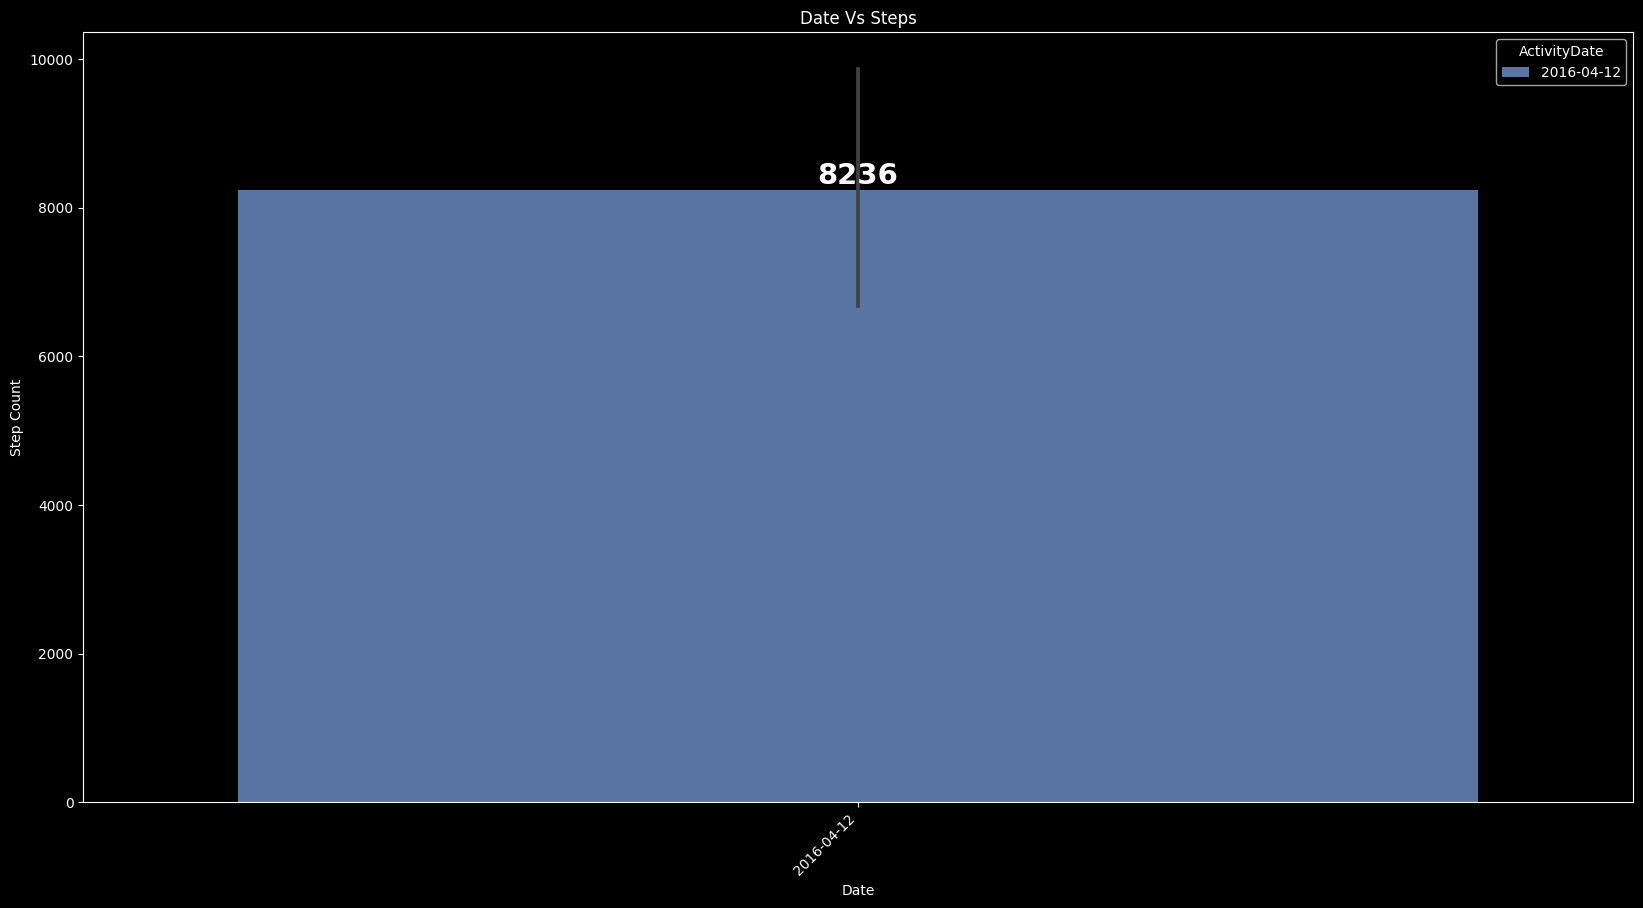

In [71]:
# Chart - 1 visualization code

plt.style.use('dark_background')

# Create a bar plot
plt.figure(figsize=(20,10))    # Adjust the figure size
ax= sns.barplot(data= md, x="ActivityDate", y="TotalSteps", hue="ActivityDate", palette='deep')

# Rotate the x-axis lables for better readability
plt.xticks(rotation=45, ha="right")
plt.xlabel("Date")
plt.ylabel("Step Count")
plt.title("Date Vs Steps")
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x,y),
        ha='center',
        va='bottom',
        fontsize= 21,
        color='white',
        fontweight='bold'
    )
    
# show the plor
plt.show()

##### 1. Why did you pick the specific chart?

The above bar plot gives a clear count of steps in vertical bar.


##### 2. What is/are the insight(s) found from the chart?

The Count total steps for the activity date is 8236.

##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

The people are consistent with working out specially walking and reaching their step goals.

------------

#### Chart - 2

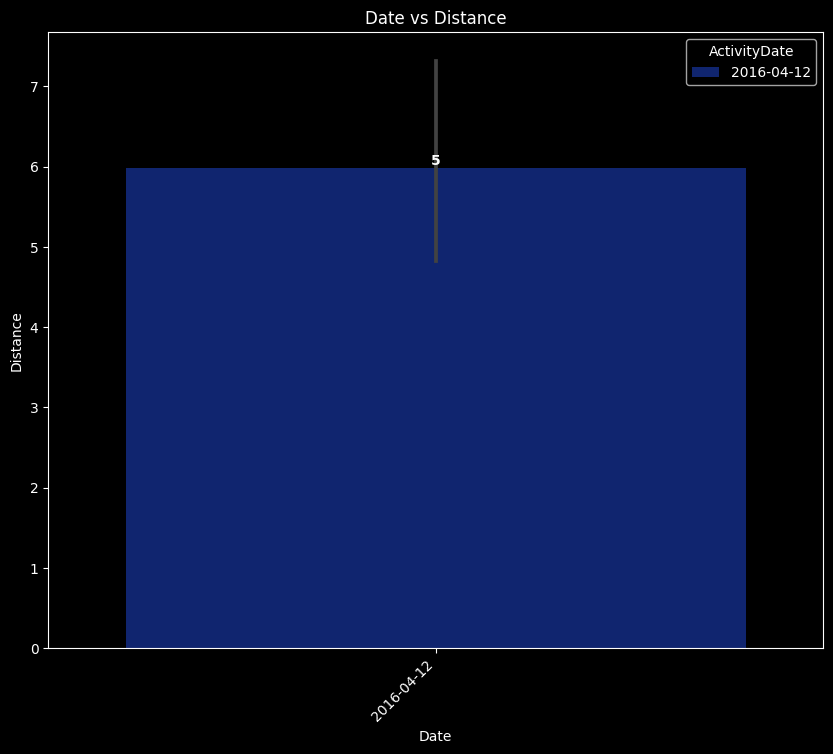

In [72]:
# Chart - 2 visualization code

plt.style.use('dark_background')

#create a bar plot
plt.figure(figsize=(10,8))  # Adjust figure size
ax= sns.barplot(data=md, x='ActivityDate', y='TotalDistance', hue='ActivityDate', palette='dark')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("Date vs Distance")
for p in ax.patches:
    count =int(p.get_height())
    x= p.get_x() + p.get_width() / 2
    y= p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha= 'center',
        va= 'bottom',
        color= 'white',
        fontweight='bold'
    )
    
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

his gives a clear distance count for the data


##### 2. What is/are the insight(s) found from the chart?

The count of distance is 5 KM for the activity data.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

This shows that people are consistent in covering required distance but can improve it by increasing the target for acheiving  better results.

------------

#### Chart - 3

In [73]:
# Chart - 3 visualization code

plt.style.use('dark_background')

md.columns = md.columns.str.strip()

# Count occurrences of each start station
step_count = md["TotalSteps"].value_counts().reset_index()
step_count.columns = ["TotalSteps", "Count"]

# Create the treemap
fig = px.treemap(step_count, path=['TotalSteps'],
                values= 'Count',
                title= "Count for Total Steps",
                color= 'Count',
                color_continuous_scale= "Rdbu")

# Show the plot
fig.show()



##### 1. Why did you pick the specific chart?

This tree map gives good visual representation with count showing capabilities when we hover over each tile


##### 2. What is/are the insight(s) found from the chart?

The following are the insights:-
1. The label id 0 has 2 count.
2. The label id 2564 has 1 count.
3. All other label also has 1-1 each count.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

People should be encouraged to set higher step goals so that they can achieve their fitness goals faster, for this strava app can organise online/ offline fitness challenges or awareness to provide its users to set high targets to achieve fitness goals faster

------------

#### Chart - 4

In [74]:
# Chart - 4 visualization code

plt.style.use('dark_background')

md.columns = md.columns.str.strip()

# Count occurrences of each TotalDistance
distance_count = md['TotalDistance'].value_counts().reset_index()
distance_count.columns = ["TotalDistance", "Count"]

# Create treemap
fig = px.treemap(
    distance_count,
    path=['TotalDistance'],
    values='Count',
    color='Count'
)

fig.show()


##### 1. Why did you pick the specific chart?

This tree map gives good visula representation with count showing capabilities when we hover over each tile.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights:-
1. The label id 0 has 2 count
2. The label id 1.639 has 1 count.
3. All other label has also 1-1 each count.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

People should be encouraged to set higher step goals so that they can achieve their fitness goals faster, for this strava app can organise online/ofline fitness challenges or awareness compaigns to provoke its users to set high target to achieve fitness goals faster.

-----------

#### Chart - 5

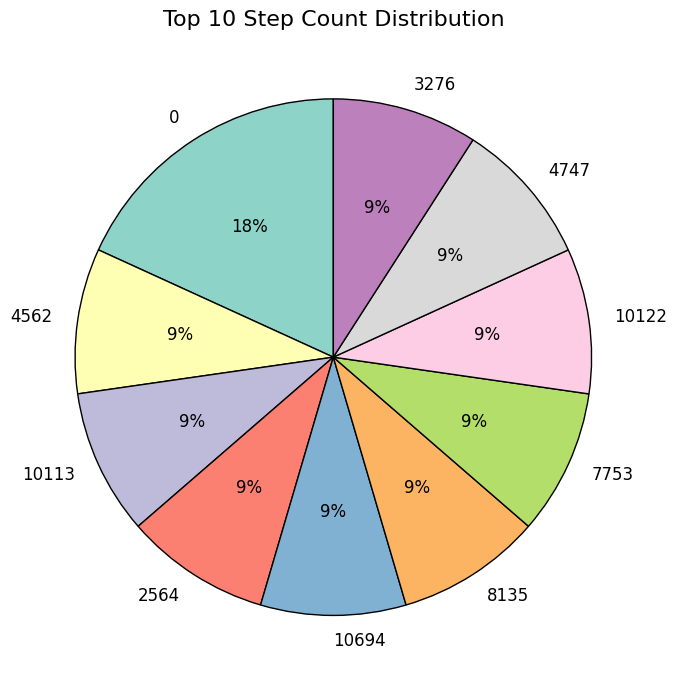

In [75]:
# Chart - 5 visualization code

plt.style.use('default')
md.columns = md.columns.str.strip()

co = md['StepTotal'].value_counts().head(10)
co.index = co.index.astype(int)

plt.figure(figsize=(15,7))

co.plot(
    kind='pie',
    labels=[str(year) for year in co.index],
    autopct=lambda p: '{:.0f}%'.format(p),
    colors=plt.cm.Set3.colors,
    startangle=90,
    textprops={'fontsize': 12, 'color': 'black'},
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Top 10 Step Count Distribution', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Pie chart are amazing way to express or visualize the dataset in a proper way.
##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above pie chart:-
1. Maximum Step count distribution for ID 0 wth 18% distribution.
2. Second highest is for ID 14172 with 9% distribution.

##### 3. Will the gained insights help creating a positive business impact?   Are there any insights that lead to negative growth? Justify with specific reason.

Poeple should be encouraged to set higher step goals so that they can achieve their fitness goals faster, for this strava app can organise online/offline challenges or awareness campaigns to provoke its users to set high targets to achieve fitness goals faster.

------------

###### Chart - 6

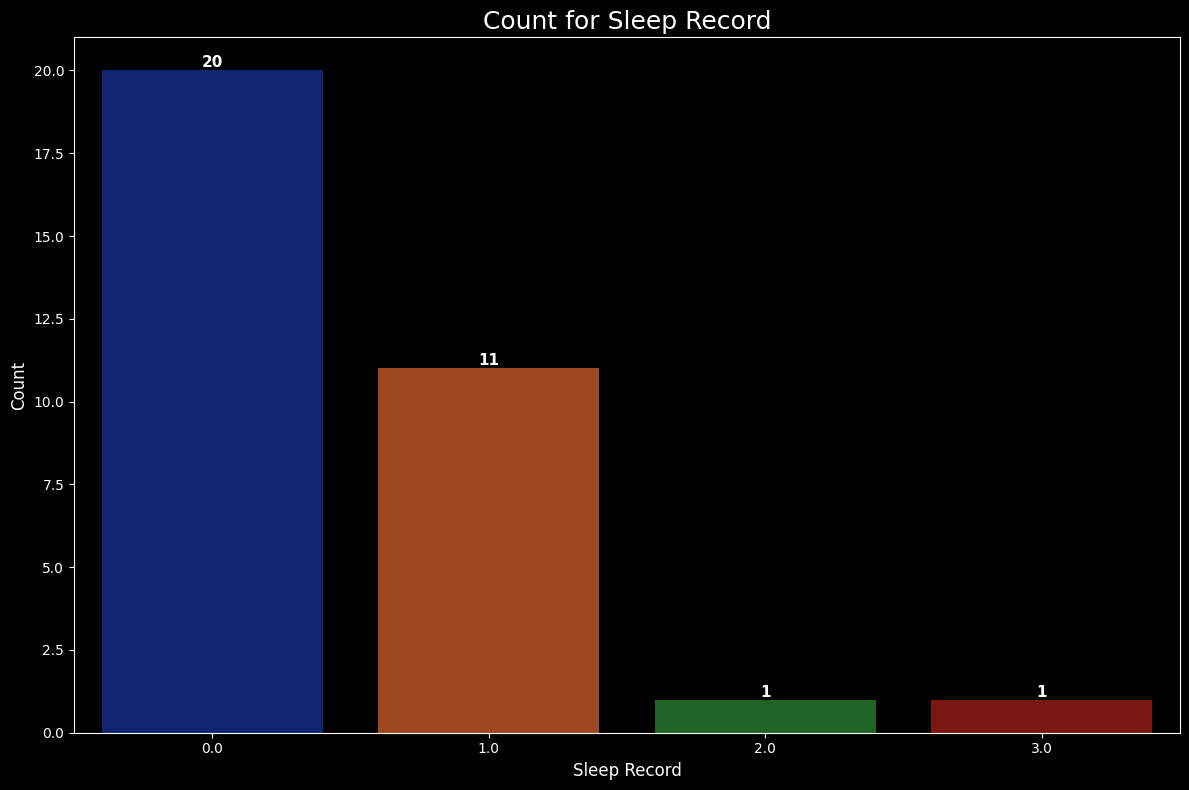

In [76]:
# Chart - 6 visualization code

plt.style.use('dark_background')

md.columns = md.columns.str.strip()

plt.figure(figsize=(12, 8))

ax = sns.countplot(
    x='TotalSleepRecords',
    data=md,
    palette='dark'
)

plt.title('Count for Sleep Record', fontsize=18)
plt.xlabel('Sleep Record', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotation
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha='center',
        va='bottom',
        fontsize=11,
        color='white',
        fontweight='bold'
    )

plt.grid(False)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The bar plot/ chart si great for showing count.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. Count for sleep record is 33.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

The above insights show that the count is very less for sleep record means strava should encourage the people to take sleep by doing ecercise and regular workout sessions.

------------

###### Chart - 7

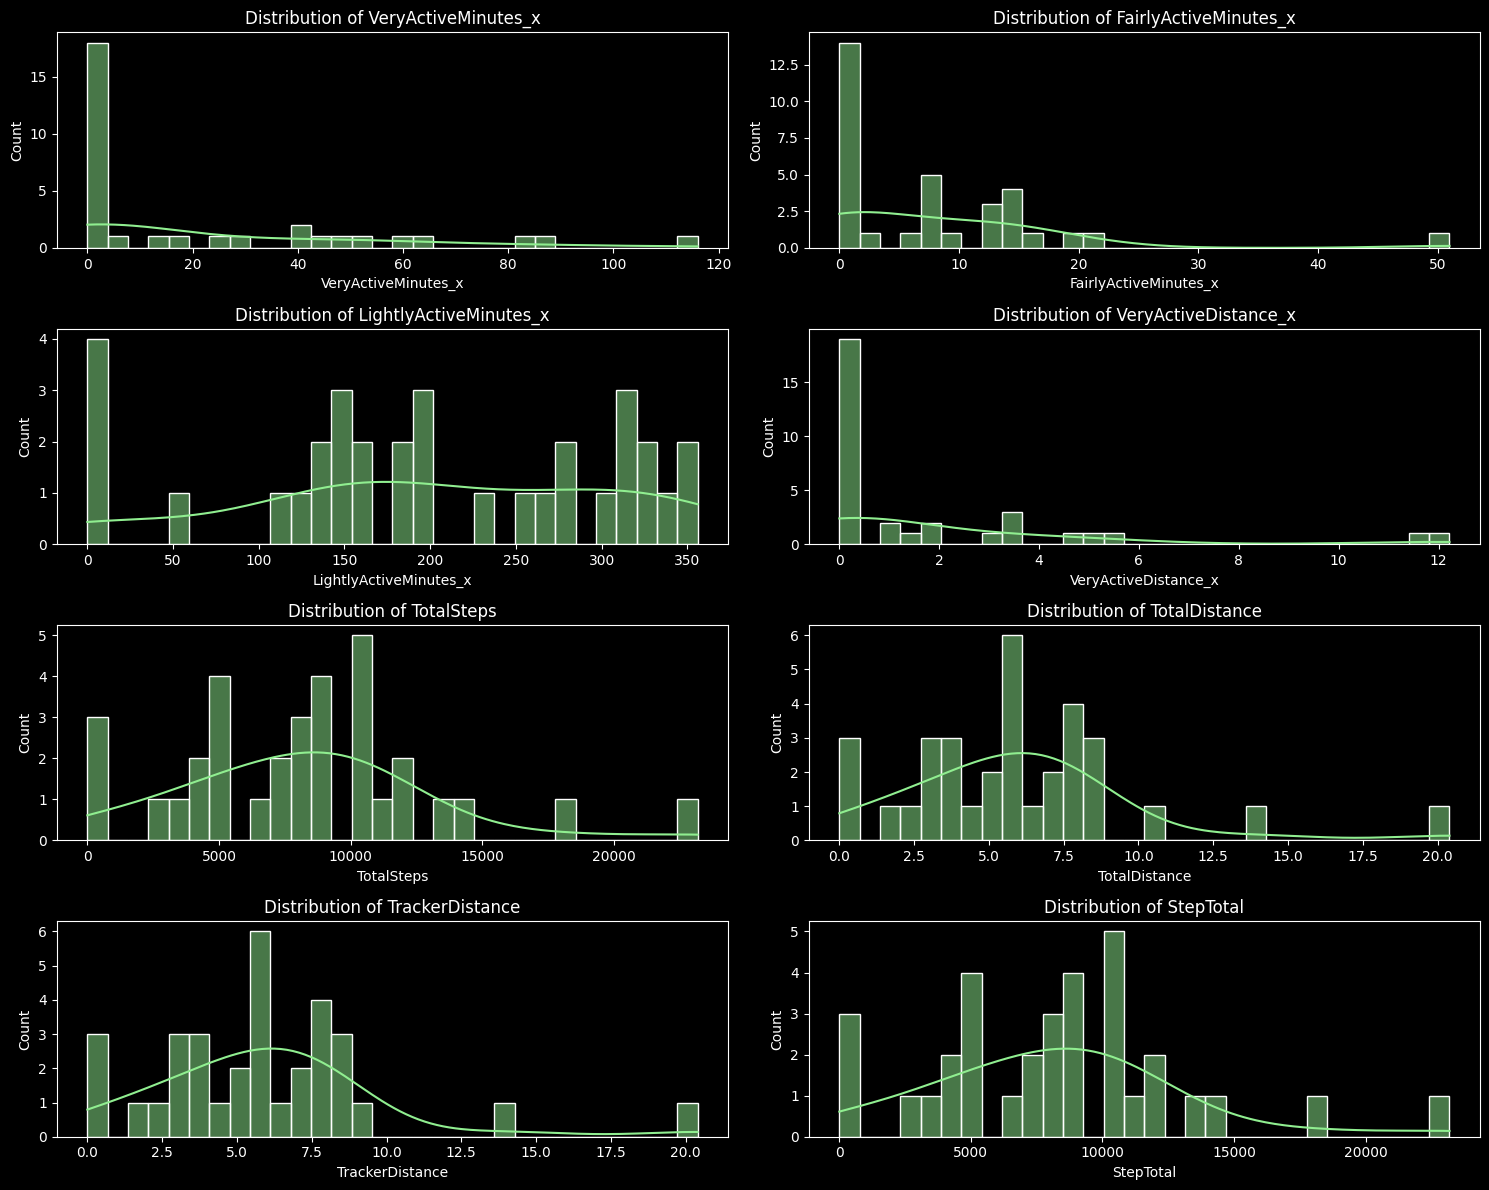

In [77]:
plt.style.use('dark_background')

numerical_features = [
    'VeryActiveMinutes_x',
    'FairlyActiveMinutes_x',
    'LightlyActiveMinutes_x',
    'VeryActiveDistance_x',
    'TotalSteps',
    'TotalDistance',
    'TrackerDistance',
    'StepTotal'
]

plt.figure(figsize=(15,12))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)   # Better layout for 8 plots
    sns.histplot(md[column], kde=True, bins=30, color='lightgreen')
    plt.title(f'Distribution of {column}', color='white')
    plt.xlabel(column, color='white')
    plt.ylabel('Count', color='white')
    plt.grid(False)

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The above chart is better for comparing numericals data types with each other and itself.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. Tracker distanace highest count is 6
2. Highest count for total steps is 5.
3. highest count for very active minutes x is 17.5
4. Highest count for fairly active minutes x is 14.
5. Highest count for lighly active minutes x is 4.
6. Highest count for Very active distance x is 18.

##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

From above insighst we can conclude that the strava app monitor on these parameters as they are well achieved by the user but surely there is hope for improvement.

-----------

###### Chart - 8

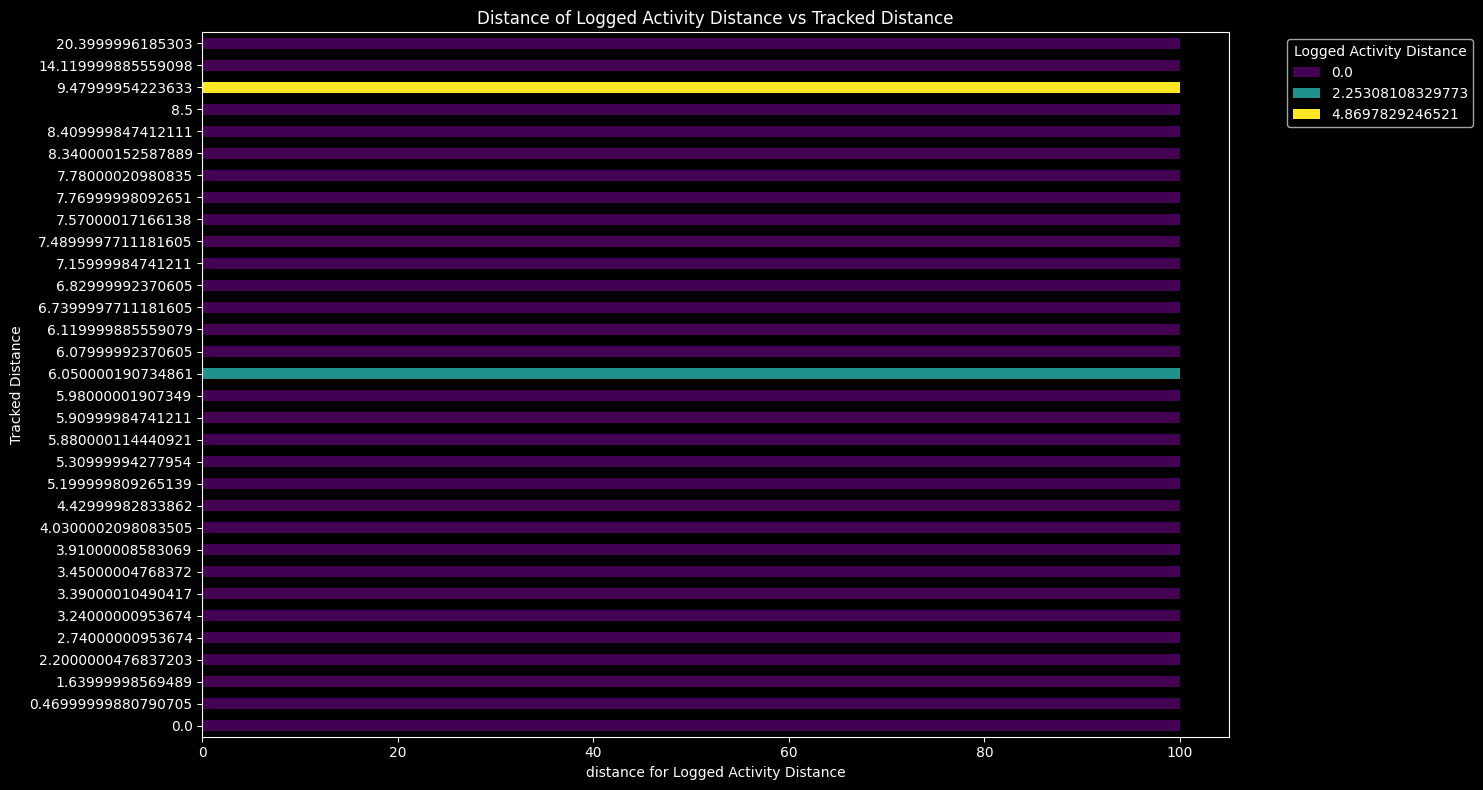

In [78]:
# Chart - 8 visualization code

data= md.groupby(['TrackerDistance', 'LoggedActivitiesDistance']).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
data_1 = data.div(data.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted figure size
data_1.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)

# Labels and title
plt.xlabel("distance for Logged Activity Distance")
plt.ylabel('Tracked Distance')
plt.title('Distance of Logged Activity Distance vs Tracked Distance')
plt.legend(title= "Logged Activity Distance", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The above multi distribution bar chart is useful for showing various entities distribution for single variable value.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. For 6.05 Tracked distance the entire distribution for 2.25 logged actively distance.
2. For 9.47 Tarcked distance the entire distribution for 4.86 logged actively distance.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

The above chart shows that the tracked distance is significantly low as per standard goals, strava can help its users achieve better targets by spreading awarness about fitness and rewarding them if they complete their certain targets.

--------------

###### Chart - 9

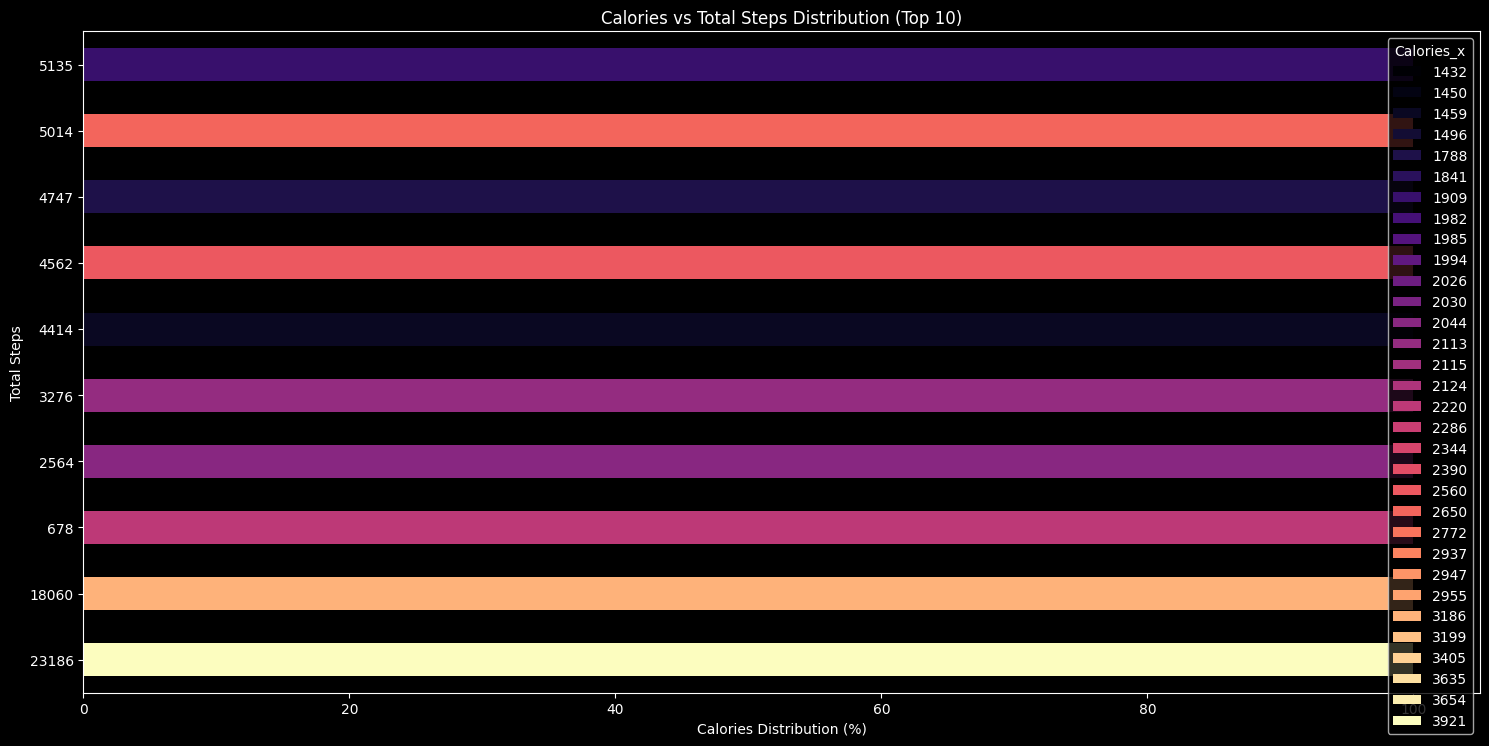

In [79]:
# Chart - 9 visualization code

plt.style.use('dark_background')

# Create pivot table works best for both groupby and unstack
data_cx = pd.crosstab(md['TotalSteps'], md['Calories_x'])

# Convert to percentage
data_cx = data_cx.div(data_cx.sum(axis=1), axis=0) * 100

# Take Top 10 TotalSteps
data_cx = data_cx.loc[data_cx.sum(axis=1).sort_values(ascending=False).head(10).index]

# Plot
data_cx.plot(kind='barh', stacked=True, colormap='magma', figsize=(15,8))

plt.xlabel("Calories Distribution (%)")
plt.ylabel("Total Steps")
plt.title("Calories vs Total Steps Distribution (Top 10)")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The above multi distribution bar chart is useful for showing various entities distribution for single variable value.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. Every step count has distribution of single entity for its whole distribution except for 0 step count.
2. For 0 step count 50% distribution is for calories_x 1496 and other 50% distribution for 1909 calories_x
3. For step count 678 the whole distribution is distributed for 2390 calories_x


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

The calories which are burned by user has great distribution for steps they have completed, strava can use this data and apply in their campaign ideas for spreading awareness about both fitness and app.

------

###### Chart - 10

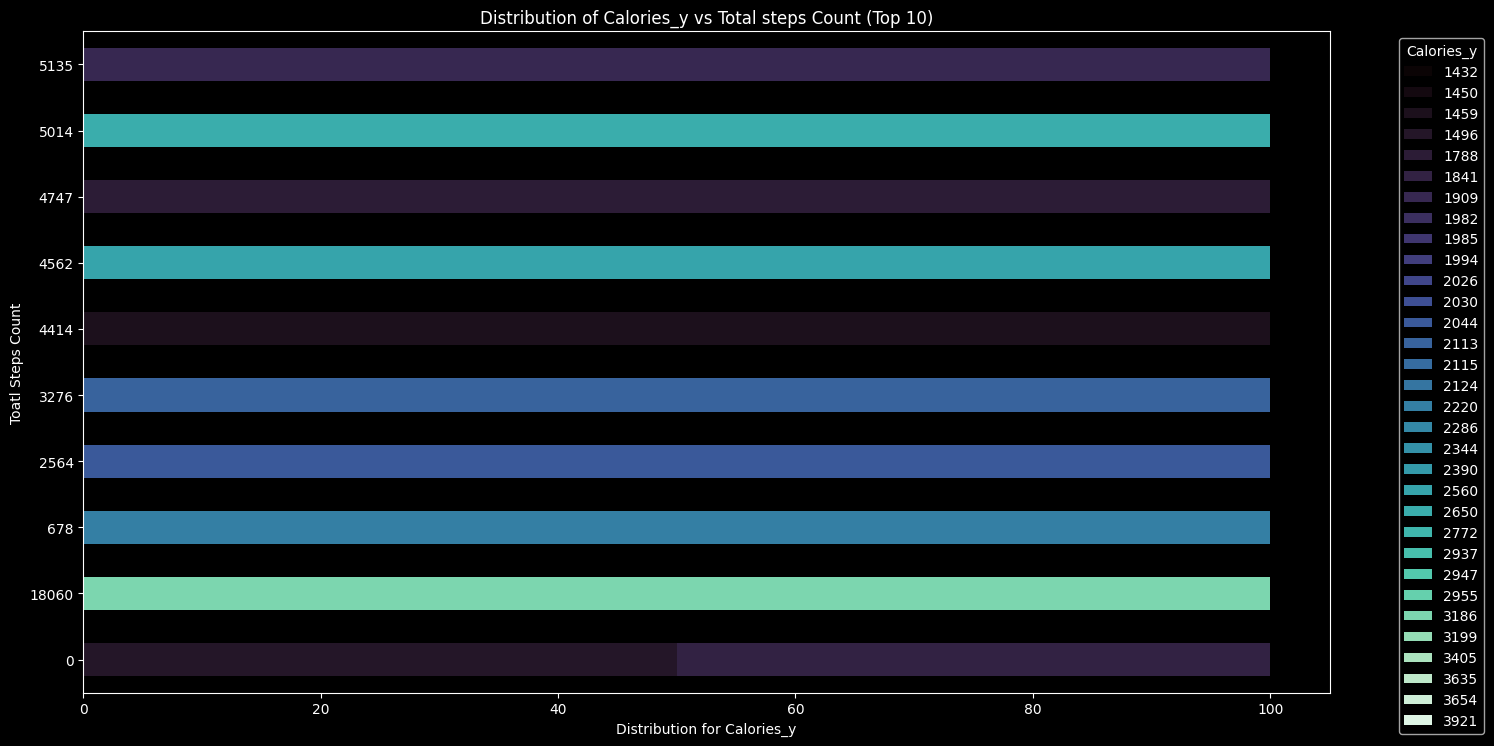

In [80]:
# Chart - 10 visualization code

plt.style.use('dark_background')

data_cy = pd.crosstab(md['TotalSteps'], md['Calories_x'])

# Normalise the data [percentage distribution]
data_cy1= data_cy.div(data_cy.sum(axis=1), axis=0)* 100

# Select top 20 stations by total trip count (sum of all user types per station)
TotalSteps_2 = data_cy.sum(axis=1).sort_values(ascending=False).head(10).index
TotalSteps_cy = data_cy1.loc[TotalSteps_2]

# Plot stacked bar chart
fig, ax = plt.subplots(figsize= (15, 8))     # Adjusted figure size
TotalSteps_cy.plot(kind='barh', stacked=True, colormap='mako', ax=ax)

# Labels and title
plt.xlabel("Distribution for Calories_y")
plt.ylabel("Toatl Steps Count")
plt.title("Distribution of Calories_y vs Total steps Count (Top 10)")
plt.legend(title="Calories_y", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()



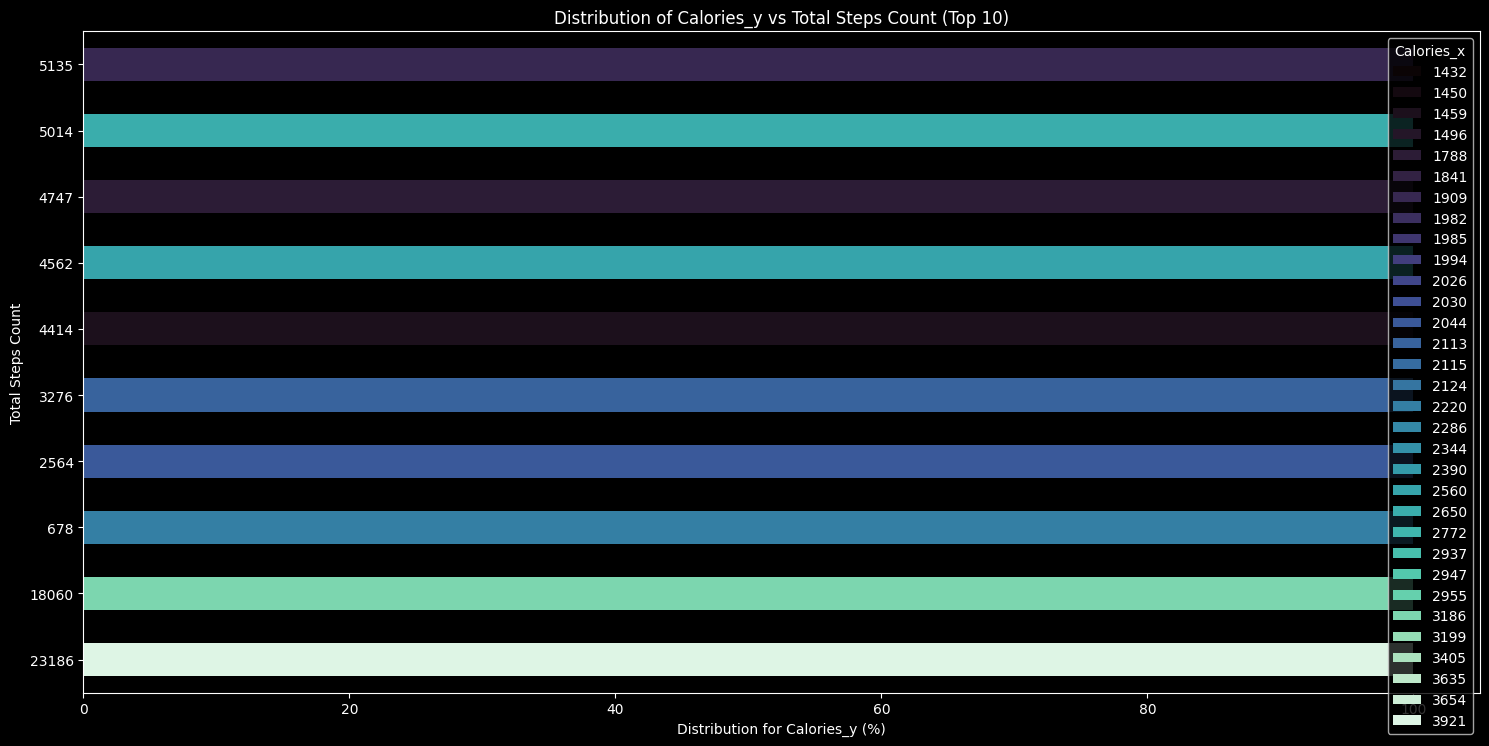

In [81]:
# Shorter code for chart 10
plt.style.use('dark_background')

data = pd.crosstab(md['TotalSteps'], md['Calories_x'])

# Normalize + Top 10 filter
data = data.div(data.sum(axis=1), axis=0) * 100
data = data.loc[data.sum(axis=1).sort_values(ascending=False).head(10).index]

# Plot
data.plot(kind='barh', stacked=True, colormap='mako', figsize=(15,8))

plt.xlabel("Distribution for Calories_y (%)")
plt.ylabel("Total Steps Count")
plt.title("Distribution of Calories_y vs Total Steps Count (Top 10)")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The above nulti distribution bar chart is useful for showing various entities distribution for single variable value.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. Every step count has distribution of single entity for its whole distribution except for 0 step count.
2. For 0 step count 50% distribution is for calories_y 1788 and other 50% distribution for 1982 calories_y.
3. For step count 678 the whole dustribution is distributed for 2772 calories_y.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

The calories which are burned by user has great distribution for steps they have completed, strava can use this data and apply in their campaign ideas for spreading awareness about both fitness and app.

----------

###### Chart - 11

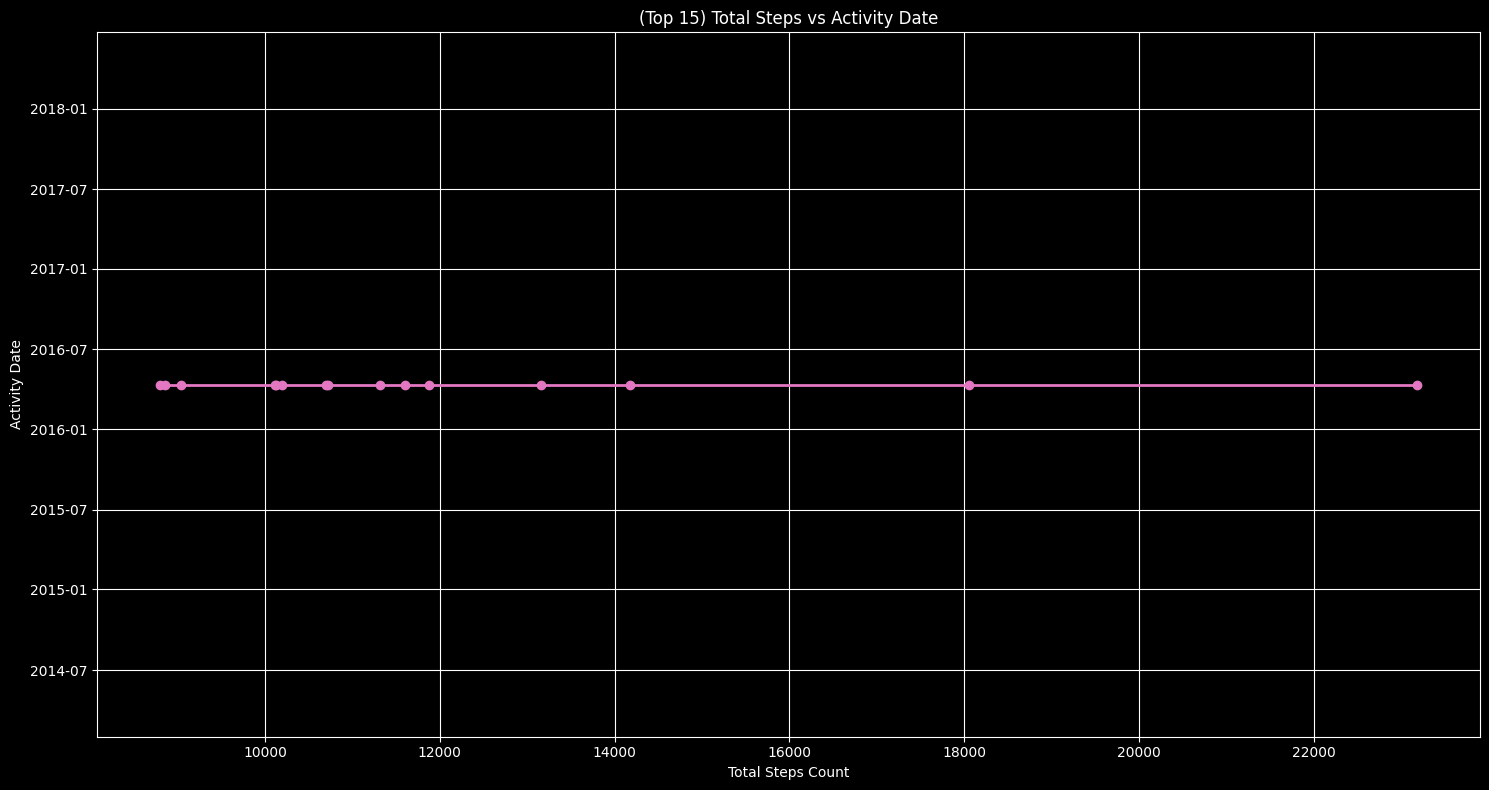

In [82]:
# Chart - 11 visualization code

plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
md.columns = md.columns.str.strip()

# Sort by date_added and release_year, then select the top 15
top_date_added = md[['TotalSteps', 'ActivityDate']].sort_values(by='TotalSteps', ascending= False).head(15)

# Plot the results
plt.figure(figsize=(15,8))
plt.plot(top_date_added['TotalSteps'], top_date_added['ActivityDate'], marker="o", color="tab:pink", linestyle='-', linewidth=2)

plt.xlabel('Total Steps Count')
plt.ylabel("Activity Date")
plt.title("(Top 15) Total Steps vs Activity Date")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The multi line chart distribution gives great trend analysis for any variable over a specific period of time.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. The above chart shows constant stagnant growth for Total steps by activity date.
2. The most congession of distribution of total steps for activity date is between 0- 14000 total steps count


##### 3. Will the gained insights help creating a positive business impact?    Are there any insights that lead to negative growth? Justify with specific reason.

This shows that many people are completing target of 14000 total steps count, but for slight improvement and to get better results, strava app can encourage its users by organising campaigns, webinars, awareness seminars or rewarding system if some user completes certain level of target helping them achieve their fitness target and also it will help in marketing strava app among users.

---------

###### Chart - 12

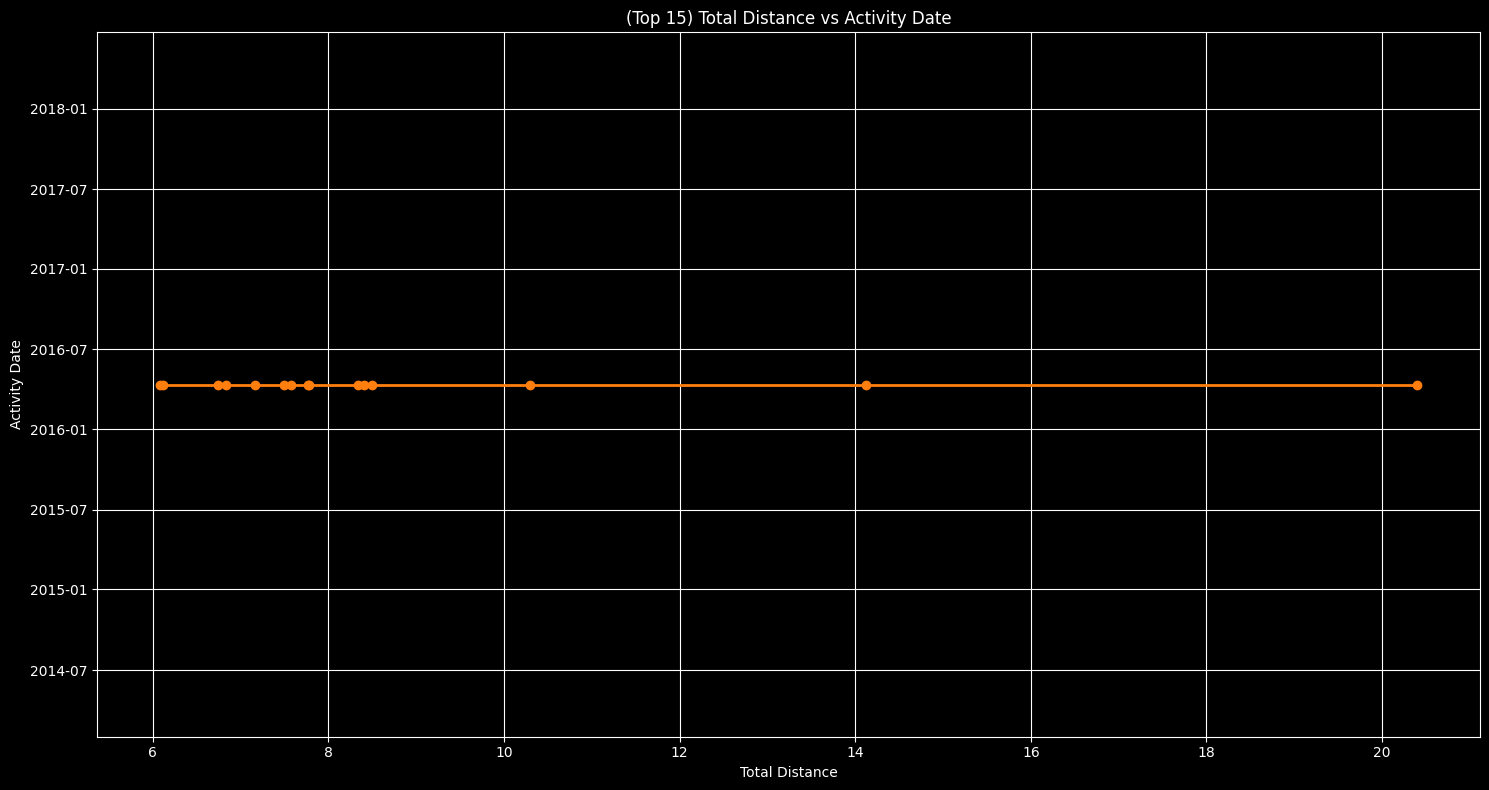

In [83]:
# Chart - 12 visualization code

plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
md.columns = md.columns.str.strip()

# Sort by TotalDistance, then select the top 15
top_distance = md[["TotalDistance", "ActivityDate"]].sort_values(
    by="TotalDistance", ascending=False
).head(15)

# Plot the results
plt.figure(figsize=(15,8))

plt.plot(
    top_distance["TotalDistance"],
    top_distance["ActivityDate"],
    marker="o",
    color="tab:orange",
    linestyle="-",
    linewidth=2
)

plt.xlabel("Total Distance")
plt.ylabel("Activity Date")
plt.title("(Top 15) Total Distance vs Activity Date")

plt.grid(True)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The multi line chart distribution gives great trend analysis for any variable over a specific period of time.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. The above chart shows content stagnant growth for Total distance by acitivity date.
2. The most congession of distribution of total distance for acitivity date is between 6-10 total distance units.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

This shows that very few people are completing target of 10 or more total distance covered, for more and more people completing this target strava app can encourage its users by organizing campaigns, webinars, awareness seminars or rewarding system if some user completes certain level of target helping them achive their target faster and also it will help in marketing strava app among users.

--------------

###### Chart - 13

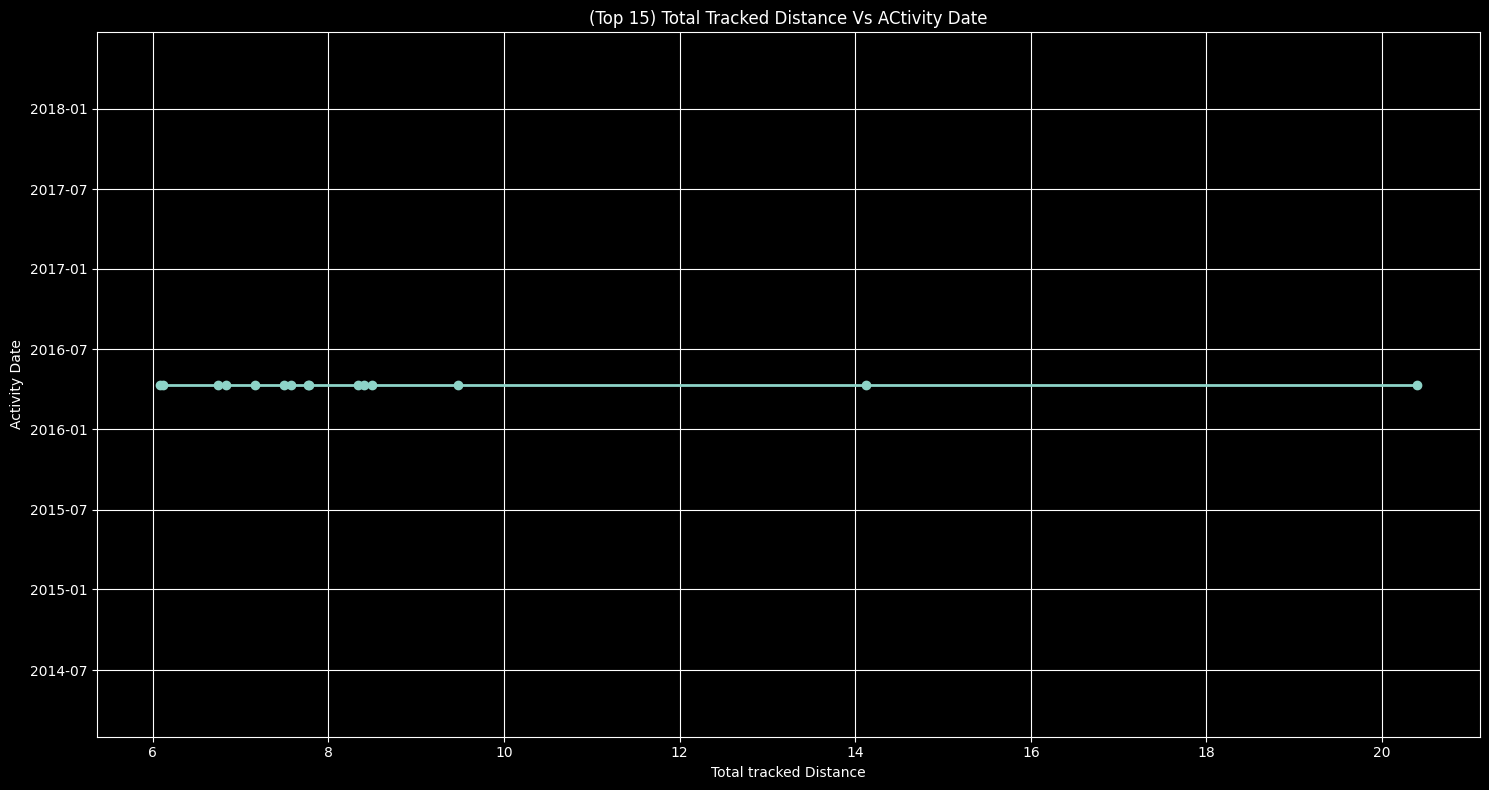

In [85]:
# Chart - 13 visualization code

plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
md.columns = md.columns.str.strip()       # strip to remove any extra spaces

# Sort by data_added and release_year, when select the top 15
top_tracked = md[['TrackerDistance', 'ActivityDate']].sort_values(by='TrackerDistance', ascending=False).head(15)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(top_tracked['TrackerDistance'], top_tracked['ActivityDate'], marker='o', linestyle='-', linewidth=2)

plt.xlabel("Total tracked Distance")
plt.ylabel("Activity Date")
plt.title("(Top 15) Total Tracked Distance Vs ACtivity Date")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The multi line chart distribution gives great trend analysis for any variable over a specific period of time.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. The above chart shows constant stagnant growth for Total tracked distance by activity date.
2. The most congession of distribution of the total distance for activity date is between 6-10 total tracked distance units.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

This shows that very few people are completing target of 10 or more total tracked distance covered, for more and more people completing this target strava app can encourage its users by organising compaigns, webinars, awareness seminars or rewarding system if some user completes certain level of target helping them achieve their fitness target faster and also it will help in marketing strava app among users.

--------

###### Chart - 14 - Correlation Heatmap

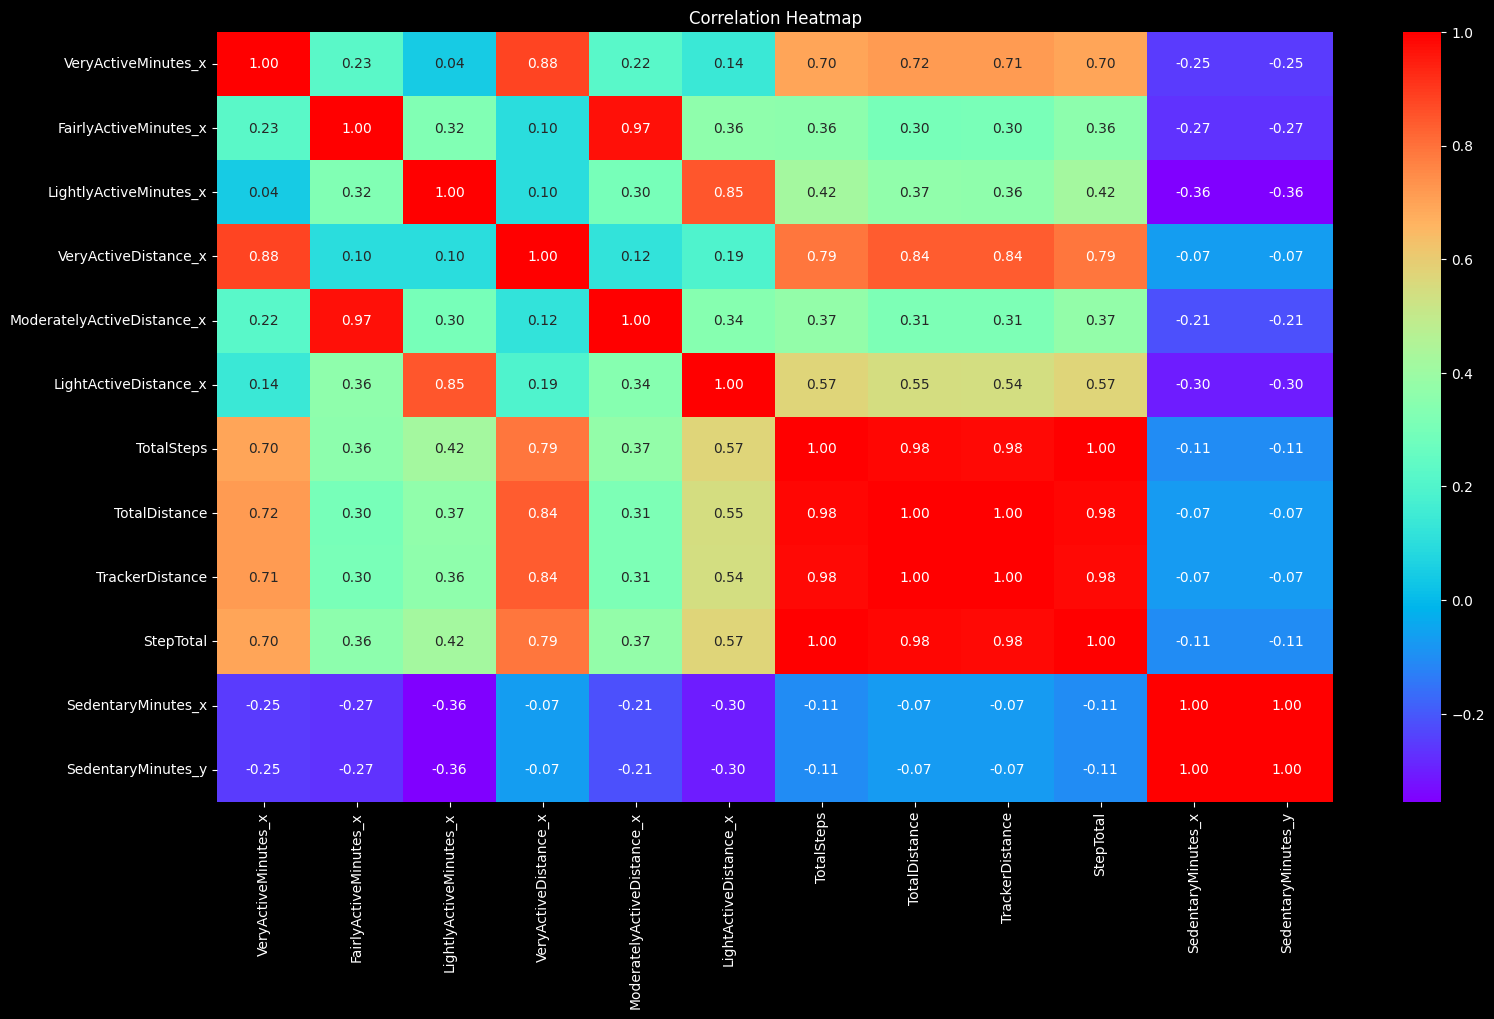

In [86]:
# Chart - 14 visualization code

columns_to_include = [
    'VeryActiveMinutes_x', 'FairlyActiveMinutes_x', 'LightlyActiveMinutes_x', 'VeryActiveDistance_x', 
    'ModeratelyActiveDistance_x', 'LightActiveDistance_x', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
    'StepTotal', 'SedentaryMinutes_x', 'SedentaryMinutes_y'
]

# filter the Dataframe using column names
md2 = md[columns_to_include]

# Compute the correlation matrix
md3= md2.corr()

# Plot the heatmap
plt.figure(figsize=(18,10))
sns.heatmap(md3, annot=True, cmap="rainbow", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

Heatmap gives better correaltion between various numerical variables in a single chart.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. The highest correalation is between Total distance and Total steps with value of 0.98.
2. Second highest correlation is between moderately active distance_x and Fairly active minutes_x with value of 0.97.
3. Third highest correaltion is between very active distance_x and very active minutes_x with value of 0.88.

_____

###### Chart - 15 - Pair Plot

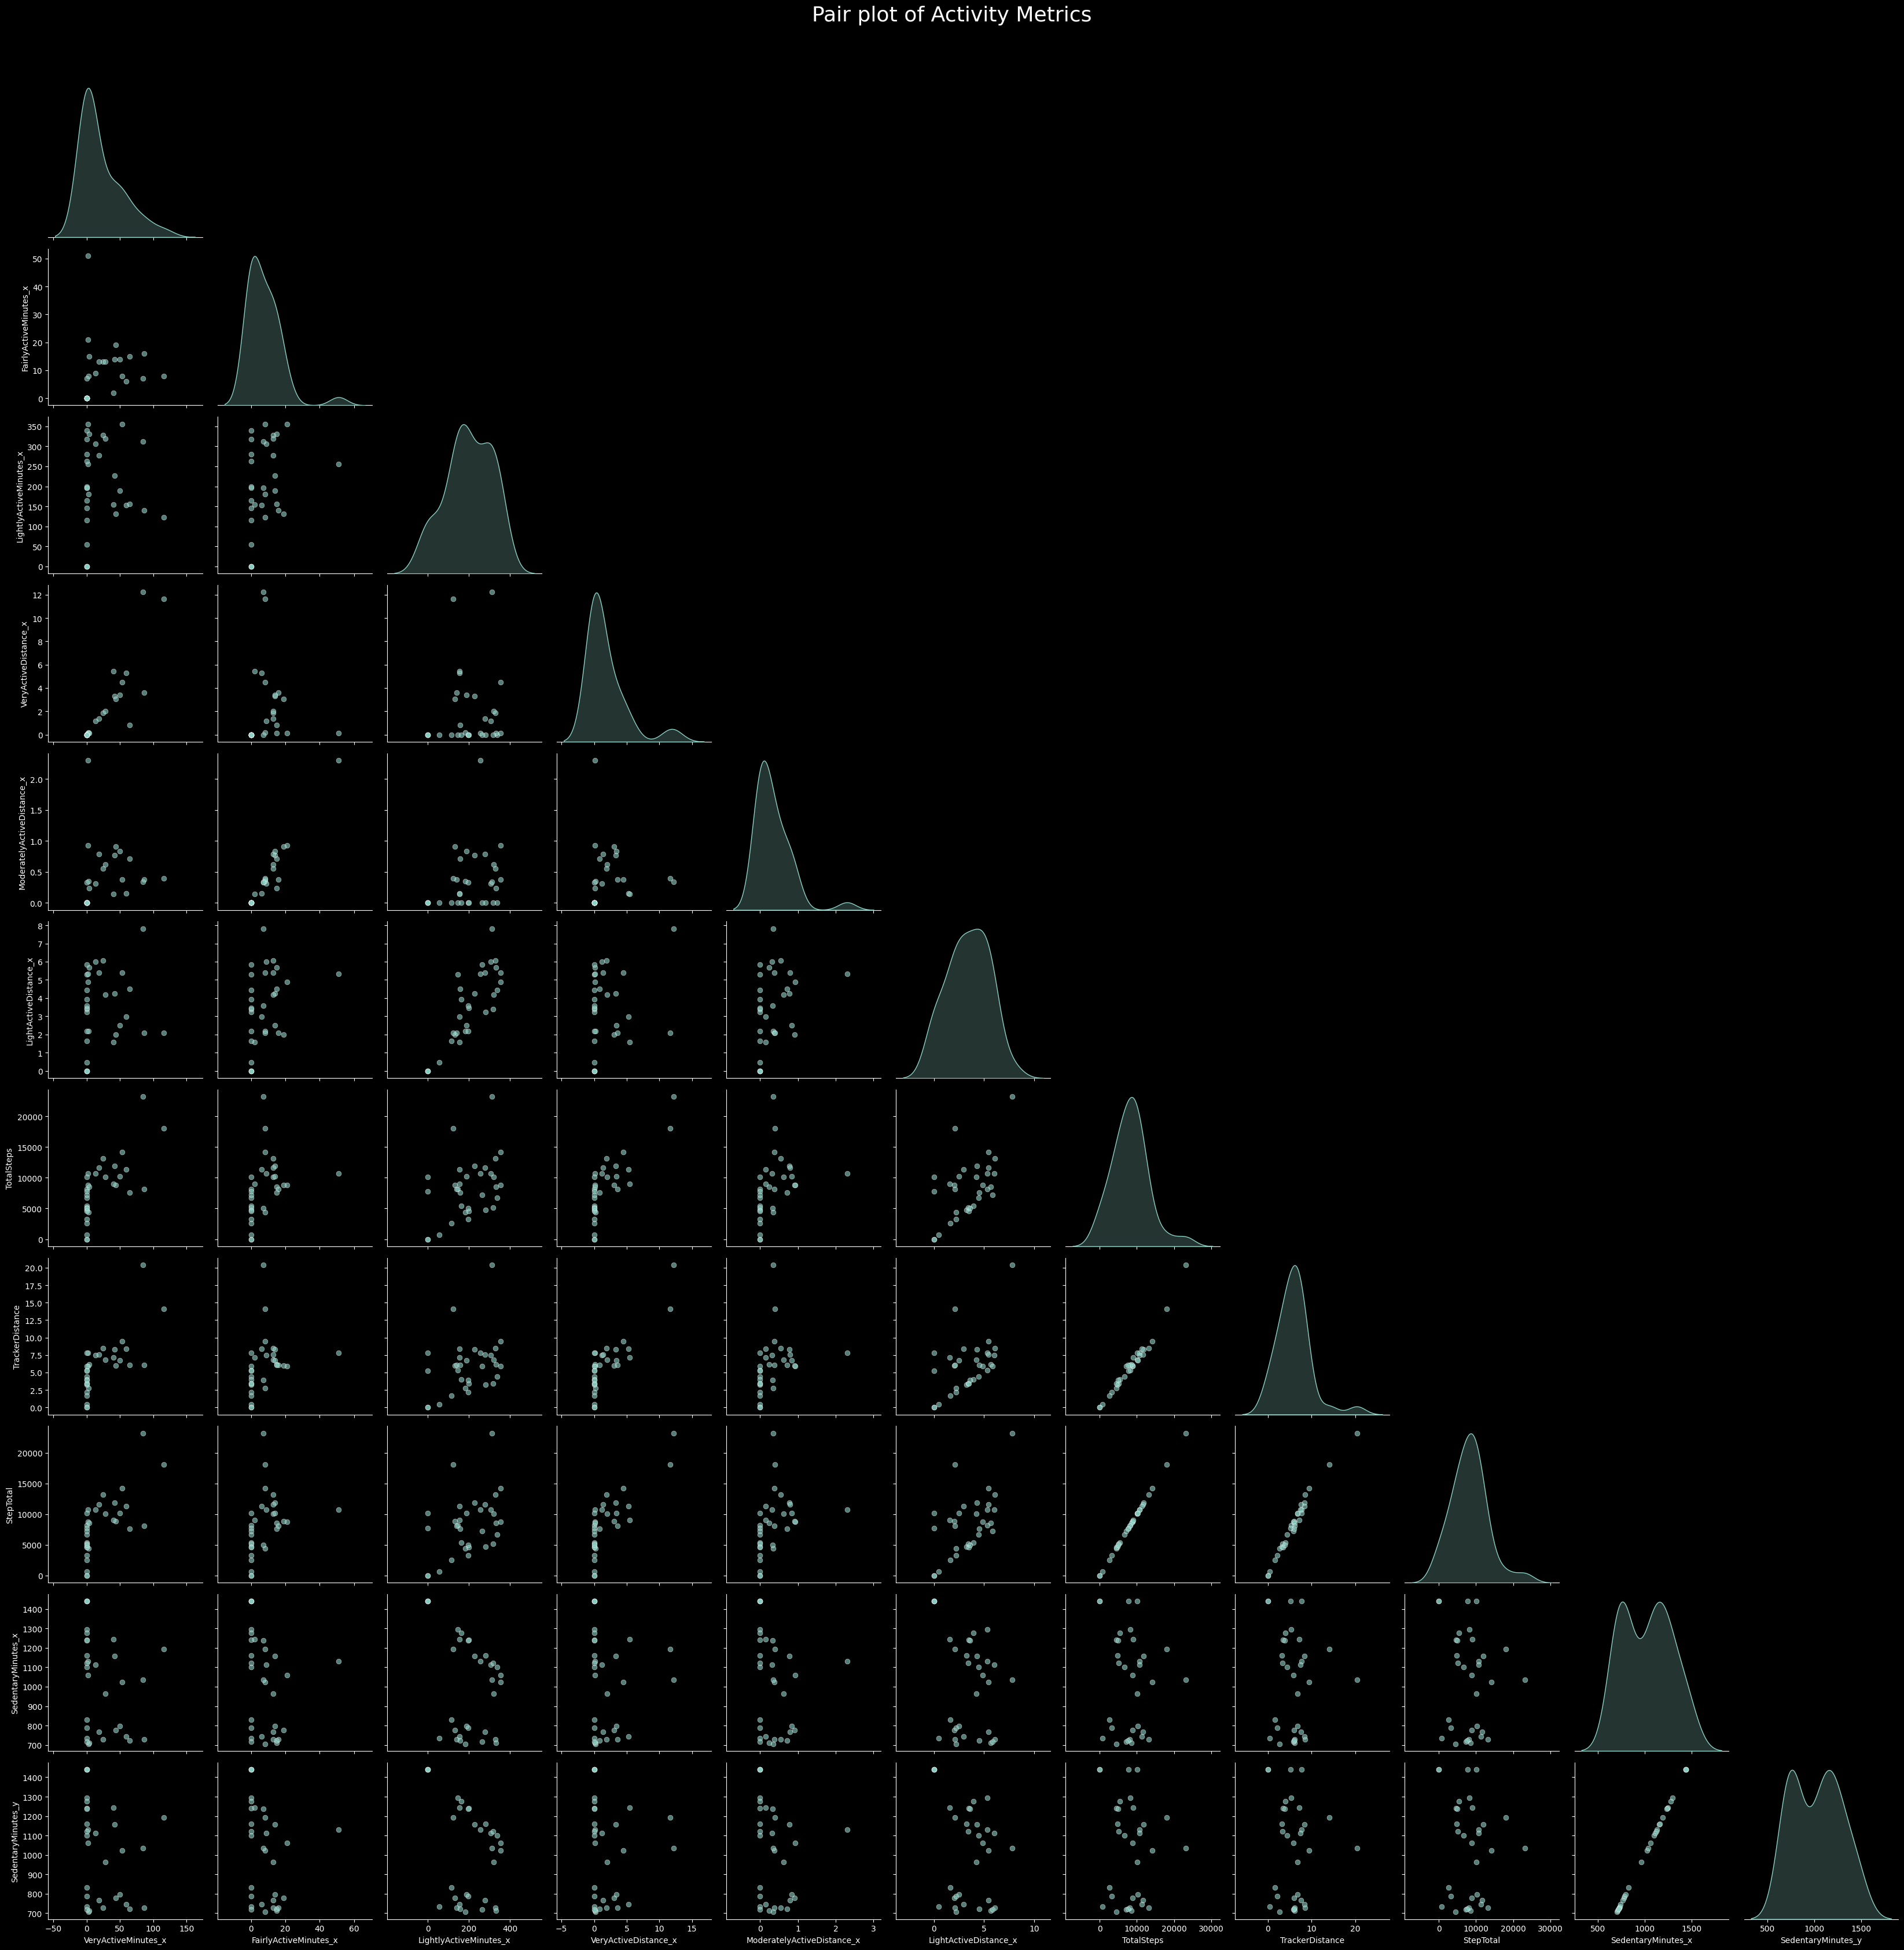

In [87]:
# Chart - 15 visualization code

columns_to_include = [
    'VeryActiveMinutes_x', 'FairlyActiveMinutes_x', 'LightlyActiveMinutes_x', 'VeryActiveDistance_x', 'ModeratelyActiveDistance_x',
    'LightActiveDistance_x', 'TotalSteps', 'TrackerDistance', 'StepTotal', 'SedentaryMinutes_x', 'SedentaryMinutes_y'
]

# Filter the DataFrame using selected columns
md2 = md[columns_to_include]

# Plot the pair plot with controled figure size (approx 4 plots per row)
sns.pairplot(md2,
             corner=True,
             diag_kind='kde',
             plot_kws={'alpha': 0.6,'s': 40},
             height=3,       # height of each subplot
             aspect=1       # Width = height * aspect ratio
            )
plt.suptitle("Pair plot of Activity Metrics", y=1.02, fontsize=26)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot is better for comparing various numerical variables in trend analysis style.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. Every single variable when compared with itself is showing steady straight slant increasing line which shows consistency.
2. When variables are compared with each other they are showing depreciating trend after certain point


------------

## 5. Solution to Business Objective

### What do you suggest the client to achieve Business Objective ?

#### Explain Briefly.

The following are the suggestions for the business to improve and achieve their targets and solve business problems:-

1. The strava app can encourage people to track their distance as people are completing lot of steps per day but not logging in or tracking distance on app which ultimately will not generate fair manual repost ata the end of the month.

2. Starva app can organize campaigns, seminars, webinars or rewarding system to encourage people join thir app to achieve fitness targets, which ultimately will amke people fit as wll as increase profits for app. 

3. Strava app can make a system if certain level of target is achieved by the user the user will offer or discount on paid membership/ subscription, this will encourage people to stay fit and health and also help strava app to gain those extra premium users, ultimately increasing profits for the company.

---------

# **Conclusion**

The following are the conclusion for the above analysis:-

1. There are 943 rows and 39 columns with 6 duplicates rows.
2. We removed all the 6 duplicate rows.
3. Replaced all the missing values in the columns with numerical value '0'.
4. The count of total steps for the activity date is 8236.
5. The count of the distance is 5 Kms for the Activity date.
6. Maximum step count distribution is for id '0' with 18% distribution.
7. Second highest is for id 14172 with 9% distribution.
8. Count for the sleep record is 33.
9. The highest correlation is between Total Distance and Total steps with value of 0.99.
10. Second highest correlation is between moderately active distance_x and fairly active minutes_x with values of 0.95
11. Third highest correlation is between very active distance_x and very active minutes_x with value of 0.83

If considerling all top 10 strong correlations then those are:
** Top 10 Strong Relationships:
1. TotalDistance ↔ TrackerDistance → ~1.00
2. TotalSteps ↔ StepTotal → ~1.00
3. SedentaryMinutes_x ↔ SedentaryMinutes_y → ~1.00
4. TotalSteps ↔ TotalDistance → ~0.98
5. TotalDistance ↔ StepTotal → ~0.98
6. TotalSteps ↔ TrackerDistance → ~0.98
7. TrackerDistance ↔ StepTotal → ~0.98
8. FairlyActiveMinutes ↔ ModeratelyActiveDistance → ~0.97
9. VeryActiveMinutes ↔ VeryActiveDistance → ~0.88
10. LightlyActiveMinutes ↔ LightActiveDistance → ~0.85

----------

###  Limitations / Drawbacks of Correlation Analysis

#### Limitation:

Some variables such as TotalSteps, StepTotal, TotalDistance, and TrackerDistance are highly correlated, indicating similar or overlapping information. Additionally, SedentaryMinutes_x and SedentaryMinutes_y suggest possible duplicate data. These factors may cause multicollinearity and increase model complexity if not handled during preprocessing.

------------